Nel mondo dell'apprendimento profondo non ci sono solo strati densi. Ci sono decine di tipi di livelli che si possono aggiungere a un modello. (Alcuni sono come i livelli densi e definiscono le connessioni tra i neuroni, mentre altri possono eseguire preelaborazioni o trasformazioni di altro tipo.

Ci sono due tipi di livelli speciali, che non contengono neuroni, ma che aggiungono alcune funzionalità che a volte possono giovare al modello in vari modi. Entrambi sono comunemente utilizzati nelle architetture moderne.

## Dropout
Il primo di questi è il "**dropout layer**", che può aiutare a correggere l'overfitting.

L'overfitting è causato dall'apprendimento da parte della rete di modelli spuri nei dati di addestramento. Per riconoscere questi schemi spuri, una rete si affida spesso a combinazioni di pesi molto specifiche, una sorta di "**cospiracy**" di pesi. Essendo così specifiche, tendono a essere fragili: se se ne toglie una, la cospirazione crolla.

Questa è l'idea alla base del **dropout**. Per rompere queste cospirazioni, eliminiamo in modo casuale una frazione delle unità di ingresso di uno strato a ogni fase dell'addestramento, rendendo molto più difficile per la rete imparare quei modelli spuri nei dati di addestramento. La rete deve invece cercare modelli ampi e generali, i cui pesi tendono a essere più robusti.
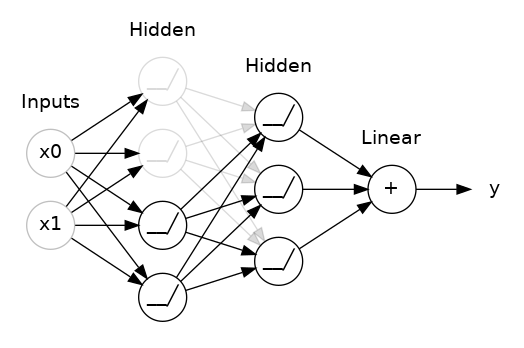
Si potrebbe anche pensare al **dropout** come alla creazione di una sorta di insieme di reti. Le previsioni non saranno più fatte da una grande rete, ma da un comitato di reti più piccole. I singoli membri del comitato tendono a commettere diversi tipi di errori, ma ad avere ragione allo stesso tempo, rendendo il comitato nel suo complesso migliore di ogni singolo individuo.

### Adding Dropout
In **Keras**, l'argomento tasso di abbandono definisce la percentuale di unità di input da spegnere. Mettere il **layer Dropout** subito prima del livello a cui si vuole applicare il dropout:

## Normalizzazione in batch
Il prossimo livello speciale che vedremo esegue la "**normalizzazione batch**" (o "**batchnorm**"), che può aiutare a correggere un addestramento lento o instabile.

Con le reti neurali, è generalmente una buona idea mettere tutti i dati su una scala comune, magari con qualcosa come **StandardScaler** o **MinMaxScaler** di **scikit-learn**. Il motivo è che **SGD** sposterà i pesi della rete in proporzione all'entità dell'attivazione prodotta dai dati. Le caratteristiche che tendono a produrre attivazioni di dimensioni molto diverse possono creare un comportamento di addestramento instabile.

Ora, se è bene normalizzare i dati prima che entrino nella rete, forse sarebbe meglio normalizzare anche all'interno della rete! In effetti, esiste un tipo speciale di livello in grado di farlo, il livello di **normalizzazione batch**. Il **layer di normalizzazione dei batch** esamina ogni batch che arriva, normalizzando prima il batch con la propria media e deviazione standard e poi mettendo i dati su una nuova scala con due parametri di riscalatura addestrabili. **Batchnorm**, in effetti, esegue una sorta di ridimensionamento coordinato dei suoi input.

Il più delle volte, **batchnorm** viene aggiunto come ausilio al processo di ottimizzazione (anche se a volte può anche aiutare le prestazioni di previsione). I **modelli con batchnorm** tendono ad avere bisogno di meno epoche per completare l'addestramento. Inoltre, la **batchnorm** può anche risolvere vari problemi che possono causare un "blocco" dell'addestramento. Considerate l'aggiunta della normalizzazione batch ai vostri modelli, soprattutto se avete problemi durante l'addestramento.

### Adding normalizzazione batch
Sembra che la normalizzazione batch possa essere utilizzata in quasi tutti i punti di una rete. Si può inserire dopo un layer.

o tra uno strato e la sua funzione di attivazione:

E se lo si aggiunge come primo livello della rete, può agire come una sorta di preprocessore adattivo, sostituendo qualcosa come lo **StandardScaler** di **Sci-Kit Learn**.

### Esempio 
**Utilizzo del dropout e della normalizzazione dei lotti**
Continuiamo a sviluppare il modello del vino rosso. Ora aumenteremo ulteriormente la capacità, ma aggiungeremo il dropout per controllare l'overfitting e la normalizzazione dei lotti per accelerare l'ottimizzazione. Questa volta, inoltre, non standardizzeremo i dati, per dimostrare come la normalizzazione dei lotti possa stabilizzare l'addestramento.

In [2]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Quando si aggiunge il dropout, potrebbe essere necessario aumentare il numero di unità nei livelli Dense.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Questa volta non c'è nulla da cambiare nel modo in cui impostiamo la formazione.

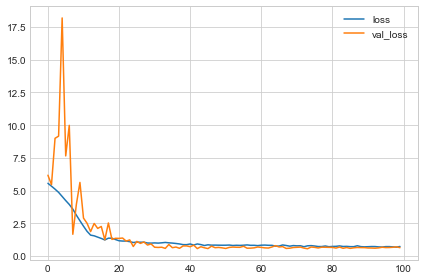

In [4]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In genere si ottengono prestazioni migliori se si normalizzano i dati prima di utilizzarli per l'addestramento. Tuttavia, il fatto che siamo riusciti a utilizzare i dati grezzi dimostra quanto possa essere efficace la normalizzazione dei lotti sui set di dati più difficili.

## Esercizi
In questo esercizio, aggiungerete il dropout al modello di Spotify e vedrete come la normalizzazione dei batch può permettervi di addestrare con successo modelli su insiemi di dati difficili.

Eseguite la cella successiva per iniziare!

In [5]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex5 import *

E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex5.py:37: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']
E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex5.py:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']
E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex5.py:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dropout']
E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex5.py:106: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']
E:\Users\Alessio\anaconda3\lib\site-packages\learntools\deep_learning_intro\ex5.py:113: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if layer.__class__.__name__ is 'Dense']


Per prima cosa caricare il set di dati di Spotify.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


### Add Dropout al modello Spotify
Ecco l'ultimo modello dell'Esercizio overfittin e underfitting. Aggiungete due livelli di dropout, uno dopo il livello Dense con 128 unità e uno dopo il livello Dense con 64 unità. Impostare il tasso di abbandono su entrambi a 0,3.

In [7]:
# YOUR CODE HERE: Add two 30% dropout layers, one after 128 and one after 64
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Eseguire ora la cella successiva per addestrare il modello e vedere l'effetto dell'aggiunta del dropout.

Minimum Validation Loss: 0.1912


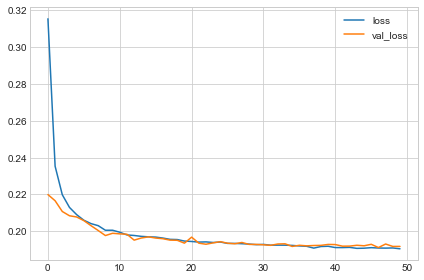

In [8]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

### Valutare il Dropout
Ricordiamo che questo modello tendeva ad adattarsi eccessivamente ai dati intorno all'epoca 5. L'aggiunta del dropout sembra aiutare a prevenire l'overfitting questa volta?

In [9]:
# View the solution (Run this cell to receive credit!)
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


From the learning curves, you can see that the validation loss remains near a constant minimum even though the training loss continues to decrease. So we can see that adding dropout did prevent overfitting this time. Moreover, by making it harder for the network to fit spurious patterns, dropout may have encouraged the network to seek out more of the true patterns, possibly improving the validation loss some as well).


Ora cambieremo argomento per esplorare come la normalizzazione dei lotti può risolvere i problemi di formazione.

Caricare il **set di dati Concrete**. Questa volta non faremo alcuna normalizzazione. Questo renderà molto più evidente l'effetto della normalizzazione batch.

In [11]:
import pandas as pd

concrete = pd.read_csv('D:/Users/Alessio/OneDrive/Python/Kaggle/Intro to Deep Learning/concrete.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

Eseguire la seguente cella per addestrare la rete sui dati non standardizzati di Concrete.

Minimum Validation Loss: nan


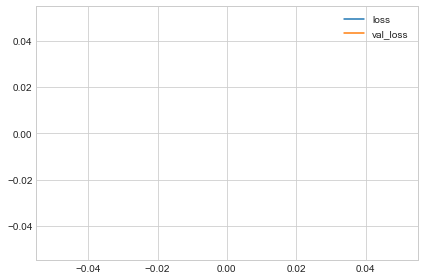

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Il risultato è un **grafico vuoto**? Se si tenta di addestrare questa rete su questo set di dati, di solito la rete fallisce. Anche quando converge (grazie a un'inizializzazione fortunata dei pesi), tende a convergere a un numero molto grande.

### Add Batch Normalization Layers
La normalizzazione batch può aiutare a correggere problemi come questo.

Aggiungere quattro livelli **BatchNormalization**, uno prima di ogni livello denso. (Ricordarsi di spostare l'argomento **input_shape** nel nuovo primo livello).

In [13]:
# YOUR CODE HERE: Add a BatchNormalization layer before each Dense layer
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Eseguire la cella successiva per verificare se la normalizzazione del batch consente di addestrare il modello.

Minimum Validation Loss: 3.7781


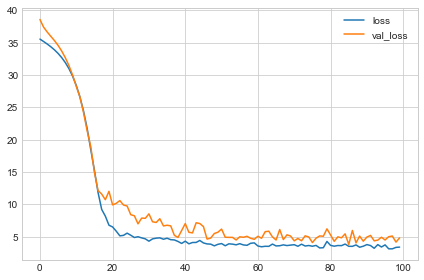

In [14]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

### Valutare la Batch normalizzazione
L'aggiunta della normalizzazione dei lotti è stata utile?

In [15]:
# View the solution (Run this cell to receive credit!)
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You can see that adding batch normalization was a big improvement on the first attempt! By adaptively scaling the data as it passes through the network, batch normalization can let you train models on difficult datasets.
